In [2]:
# maths for Rakki 2
import math
import random

def mult(mxln):
    a = random.randrange(1, mxln)
    b = random.randrange(1, mxln)
    return (a , b, a*b)

def div(mxln):
    a = random.randrange(1, mxln)
    b = random.randrange(1, mxln)
    return (a*b , b, a)

def add(mxln):
    a = random.randrange(1, mxln)
    b = random.randrange(1, mxln)
    sgn = random.choice(['+', '-'])
    if b > a:
        b, a = a, b
    return (a , sgn, b, eval('a' + sgn + 'b'))

if __name__=="__main__":
    for i in range(6):
        print('mult: ', mult(10))
    for i in range(3):
        print('div: ', div(10))
    for i in range(2):
        print(add(30))

mult:  (8, 3, 24)
mult:  (5, 4, 20)
mult:  (9, 9, 81)
mult:  (1, 2, 2)
mult:  (1, 2, 2)
mult:  (4, 1, 4)
div:  (18, 2, 9)
div:  (63, 9, 7)
div:  (18, 2, 9)
(16, '+', 4, 20)
(3, '-', 1, 2)


In [2]:
# maths for Meia
import math
import random

def lcm(a,b):
    return int(abs(a * b) / math.gcd(a,b) if a and b else 0)

def exfract(a,b):
    gcdab = math.gcd(a, b)
    a /= gcdab
    b /= gcdab
    mult = random.randrange(2, 15)
    return (int(a), int(b), mult, int(a*mult), int(b*mult))

def prdfr(p):
    '''periodic p as fraction'''
    l = len(str(p))
    return (p, 10**l - 1)

def frdec(mxln):
    a = random.randrange(1, mxln)
    b = random.randrange(1, mxln)
    return (a , 10**len(str(a)))

def ordfrc(mxln, mxv):
    res = []
    for i in range(mxln):
        a = random.randrange(1, mxv)
        b = random.randrange(1, mxv)
        res.append((a,b))
        res.sort(key=lambda x: x[0]/x[1])
    return res

def addfr(mxln):
    a = random.randrange(1, mxln)
    b = random.randrange(1, mxln)
    c = random.randrange(1, mxln)
    d = random.randrange(1, mxln)
    lcmcd = lcm(c,d)
    sgn = random.choice(['+', '-'])
    return (a , c, sgn, b, d, eval('lcmcd/c*a' + sgn + 'lcmcd/d*b'), lcmcd)

if __name__=="__main__":
    for i in range(3):
        a = random.randrange(2, 20)
        b = random.randrange(2, 20)
        print('fraction ', exfract(a, b))
        
    for i in range(1):
        a, b = frdec(10**random.randrange(2, 8))
        print(a, b, a/b)
        
    for i in range(2):
        print(ordfrc(3, 25))
        
    for i in range(3):
        a = random.randrange(-5, 5)
        b = random.randrange(-5, 5)
        print('x, y: ', (a, b))
        
    for i in range(4):
        print(addfr(15))

fraction  (8, 9, 2, 16, 18)
fraction  (9, 7, 10, 90, 70)
fraction  (7, 2, 3, 21, 6)
49 100 0.49
[(9, 18), (23, 9), (16, 1)]
[(23, 8), (24, 5), (22, 3)]
x, y:  (-5, -3)
x, y:  (1, 1)
x, y:  (2, 4)
(13, 6, '+', 14, 13, 253.0, 78)
(4, 2, '+', 7, 13, 66.0, 26)
(9, 5, '-', 1, 1, 4.0, 5)
(7, 1, '-', 8, 7, 41.0, 7)


In [29]:
# https://stackoverflow.com/questions/65811555/solving-dijkstras-algorithm-passing-costs-parents-with-two-edges

# graph table
graph = {}
graph['start'] = {}
graph['start']['a'] = 5
graph['start']['b'] = 2

graph['a'] = {}
graph['a']['c'] = 4
graph['a']['d'] = 2 

graph['b'] = {}
graph['b']['a'] = 8
graph['b']['d'] = 7

graph['c'] = {}
graph['c']['d'] = 6
graph['c']['finish'] = 3

graph['d'] = {}
graph['d']['finish'] = 1
graph['finish'] = {}

costs = {}
infinity = float('inf')
costs['a'] = 5
costs['b'] = 2
costs['c'] = 4 
costs['d'] = 2 # there is 3 costs to node D, which one to select?
costs['finish'] = infinity

parents = {}
parents['a'] = 'start' # why not start and b since both `S` and `B` can be `A` nodes parent?
parents['b'] = 'start'
parents['c'] = 'a'
#parents['d'] =  # node D can have 3 parents
parents['finish'] = None

processed = []

def find_lowest_cost_node(costs):
    lowest_cost = float('inf')
    lowest_cost_node = None

    for node in costs:
        cost = costs[node]

        if cost < lowest_cost and node not in processed:
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node



node = find_lowest_cost_node(costs)

while node is not None:
  cost = costs[node]
  neighbors = graph[node]
  for n in neighbors.keys():
      new_cost = cost + neighbors[n]
      if costs[n] > new_cost:
          costs[n] = new_cost
          parents[n] = node
  processed.append(node)
  node = find_lowest_cost_node(costs)


def find_path(parents, finish):
  path = []
  node = finish
  while node:
      path.insert(0, node)
      if parents.__contains__(node):
          node = parents[node]
      else:
          node = None
  return path


#path = find_path(parents, 'finish')
#distance = costs['finish']
path = find_path(parents, 'a')
distance = costs['a']

print(f'Path is: {path}')
print(f'Distance from start to finish is: {distance}')

Path is: ['start', 'a']
Distance from start to finish is: 5


In [31]:

from collections import namedtuple, deque
from pprint import pprint as pp
 
 
inf = float('inf')
Edge = namedtuple('Edge', ['start', 'end', 'cost'])
 
class Graph():
    def __init__(self, edges):
        self.edges = [Edge(*edge) for edge in edges]
        # print(dir(self.edges[0]))
        self.vertices = {e.start for e in self.edges} | {e.end for e in self.edges}
 
    def dijkstra(self, source, dest):
        assert source in self.vertices
        dist = {vertex: inf for vertex in self.vertices}
        previous = {vertex: None for vertex in self.vertices}
        dist[source] = 0
        q = self.vertices.copy()
        neighbours = {vertex: set() for vertex in self.vertices}
        for start, end, cost in self.edges:
            neighbours[start].add((end, cost))
        #pp(neighbours)
 
        while q:
            # pp(q)
            u = min(q, key=lambda vertex: dist[vertex])
            q.remove(u)
            if dist[u] == inf or u == dest:
                break
            for v, cost in neighbours[u]:
                alt = dist[u] + cost
                if alt < dist[v]:                                  # Relax (u,v,a)
                    dist[v] = alt
                    previous[v] = u
        #pp(previous)
        s, u = deque(), dest
        while previous[u]:
            s.appendleft(u)
            u = previous[u]
        s.appendleft(u)
        return s
 
 
graph = Graph([("start", "a", 5),  ("start", "b", 2),  ("a", "c", 4), ("a", "d", 2),
               ("b", "a", 8), ("b", "d", 7), ("c", "d", 6),  ("c", "finish", 3),
               ("d", "finish", 1)])
pp(graph.dijkstra("start", "finish"))

deque(['start', 'a', 'd', 'finish'])


In [27]:
# https://stackoverflow.com/questions/65831582/numpy-searchsorted-along-many-dimensions
import numpy as np
import bisect

def find(x,y):
    rows = np.zeros(y.shape, dtype=np.int)
    for ii in range(y.shape[0]):
        for jj in range(y.shape[1]):
            rows[ii, jj] = np.searchsorted(x[:, ii, jj], y[ii, jj])
    return rows

np.random.seed(42)
h = np.random.random((3,2))
f = np.random.random((2))
print(h,f)
print(find(h,f))

#a = [2, 3, 4, 5]
#print(bisect.bisect_left(a, 6, lo=0, hi=len(a)))
print(bisect.bisect_left(a, 5, lo=0, hi=len(a)))

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]] [0.05808361 0.86617615]


IndexError: tuple index out of range

In [5]:
import numpy as np

shrt = np.array([148,150,153,154])
tll = np.array([155,158,159,160,165])
print(np.average(shrt), np.average(tll))
shrt = np.array([148,150,153,154,160])
tll = np.array([155,158,159,165])
print(np.average(shrt), np.average(tll))

print(np.sqrt([25,20,18,10,20,8,7,8,6])/5)

151.25 159.4
153.0 159.25
[1.         0.89442719 0.84852814 0.63245553 0.89442719 0.56568542
 0.52915026 0.56568542 0.48989795]


In [10]:

# d{"the": 5}

d = {'the': 3}
d.update({'the': d.get('the')+1})
print(d)
#d.update({'and': d.get('and')+1}) # throws KeyError

from collections import defaultdict

doc = 'the red fox jumps'
dd = defaultdict(int) # integer counter
for k in doc.split(' '):
    dd[k] += 1

print(sorted(dd.items()))

dd['the'] += 1 # add a new word

print(sorted(dd.items()))

{'the': 4}
[('fox', 1), ('jumps', 1), ('red', 1), ('the', 1)]
[('fox', 1), ('jumps', 1), ('red', 1), ('the', 2)]


In [14]:

a = [0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3]
b = [24, 53, 88, 32, 45, 24, 88, 53, 11, 22, 33, 44, 55, 66, 77]

d = {}
for x, y in zip(a, b):
    d.setdefault(x, []).append(y)
    
for el in d.items():
    print("ID:" + str(el[0]), "Lottery" + str(el[1]))

ID:0 Lottery[24, 53, 88]
ID:1 Lottery[32, 45, 24, 88, 53]
ID:2 Lottery[11, 22, 33, 44, 55, 66]
ID:3 Lottery[77]


In [26]:
# https://stackoverflow.com/questions/65860467/how-do-i-calculate-the-exponential-moving-average-in-python/65860818#65860818

def ema(prices, period):
    if len(prices) < period:
        return 'Not enough data to calculate EMA'
    return ema_helper2(prices, period, (2 / (period + 1)), len(prices))

def ema_helper(prices, N, k, length):
    if len(prices) == length-N:
        return prices[0]
    res_ema = [p for p in prices[:N]] # this keeps the ema
    for t in range(N, length):
        res_ema.append(prices[t] * k + res_ema[t-1] * (1 - k))
    return res_ema[-1]

def ema_helper2(prices, N, k, length):
    if len(prices) == length-N:
        return prices[0]
    res_ema = prices[N-1]
    for t in range(N, length):
        res_ema = (prices[t] * k + res_ema * (1 - k))
    return res_ema

'''EMA = Price(t) × k + EMA(y) × (1 − k)
where:
t = today
y = yesterday
N = number of days in EMA
k = 2 ÷ (N + 1)'''

prcs = [22.27, 22.19, 22.08, 22.17, 22.18, 22.13, 22.23, 22.43, 22.24, 22.29, 22.15, 22.39, 22.38, 22.61, 23.36, 24.05, 23.75, 23.83, 23.95, 23.63, 23.82, 23.87, 23.65, 23.19, 23.1, 23.33, 22.68, 23.1, 22.4, 22.17]

print(ema(prcs, 10))

22.916251374089523


In [15]:
# https://stackoverflow.com/questions/65871748/check-if-an-element-in-a-list-has-a-value-in-a-defined-position

counts = {'0001': 0.0001220703125, '0010': 0.000244140625, '0100': 0.0003662109375, '0101': 0.245849609375, '0110': 0.2486572265625, '0111': 0.000244140625, '1000': 0.0009765625, '1001': 0.2508544921875, '1010': 0.252197265625, '1101': 0.00048828125, '0000': 0.0, '0011': 0.0, '1011': 0.0, '1100': 0.0, '1110': 0.0, '1111': 0.0}

def addcts(keystr, x, xv, y, yv):
    if x > len(keystr) or y > len(keystr):
        return False
    if keystr[x] == str(xv) and keystr[y] == str(yv):
        return True
    return False

print(sum([kel[1] for kel in counts.items() if addcts(kel[0], 2, 1, 3, 0)])) # 1 at position 2 and 0 at position 3

'''testdict = {}

to_add_end = "10"

for binary in idxl:
    testdict[binary] = int(binary)

filtered_dict = dict(filter(lambda entry:entry[0][-len(to_add_end):] == to_add_end, testdict.items()))
print(sum(filtered_dict.values()))'''

0.5010986328125


'testdict = {}\n\nto_add_end = "10"\n\nfor binary in idxl:\n    testdict[binary] = int(binary)\n\nfiltered_dict = dict(filter(lambda entry:entry[0][-len(to_add_end):] == to_add_end, testdict.items()))\nprint(sum(filtered_dict.values()))'

In [42]:
# necklace matching
from itertools import permutations

def flip(nckl):
    return nckl[:] == nckl[::-1]

def shftn(nckl, n):
    ln = len(nckl)
    return [nckl[(p+n) % ln] for p in range(ln)]

def trans(nckl0, nckl1):
    for i in range(1, len(nckl0)):
        sn = shftn(nckl1, i)
        if nckl0 == sn or nckl0 == flip(sn):
            return True # the same under shifts and flips
    return False # different

print(trans([1,1,0],[1,0,1]))
print(trans([1,0,0],[1,0,1]))

True
False


In [8]:


def vending_process(): # no need to pass 'item' as this is an inpt
    balance=20
    vending_items={'Haribo':20 , 'Hershey':21, 'Lays':22, 'Cheetos':23, 'Pepsi':24, 'Dew':25, 'Rockstar':26, 'Monster': 27, 'Starbucks':28, 'Nescafe':29}
    
    while balance > 0: # continue process till balance drops below 0
        item=int(input("Choose your item from the vending machine! Choose -1 to abort: "))
        if item==-1:
            return -1 # exit (return preferable)
        if item not in vending_items.values():
            print("No such entry!")
            return -2 # invalid item
        if item == 20:
            balance -= 1.5
            print('You bought Haribo for 1.50! your balance is {}'.format(balance))
                
vending_process()

Choose your item from the vending machine! Choose -1 to abort: 20
You bought Haribo for 1.50! your balance is 18.5
Choose your item from the vending machine! Choose -1 to abort: 20
You bought Haribo for 1.50! your balance is 17.0
Choose your item from the vending machine! Choose -1 to abort: 20
You bought Haribo for 1.50! your balance is 15.5
Choose your item from the vending machine! Choose -1 to abort: 20
You bought Haribo for 1.50! your balance is 14.0
Choose your item from the vending machine! Choose -1 to abort: 20
You bought Haribo for 1.50! your balance is 12.5
Choose your item from the vending machine! Choose -1 to abort: 20
You bought Haribo for 1.50! your balance is 11.0
Choose your item from the vending machine! Choose -1 to abort: 20
You bought Haribo for 1.50! your balance is 9.5
Choose your item from the vending machine! Choose -1 to abort: 20
You bought Haribo for 1.50! your balance is 8.0
Choose your item from the vending machine! Choose -1 to abort: 20
You bought Harib

[[ 69.21818182  45.88363636 107.26363636  53.29636364 145.30909091
   65.65090909 183.35454545  82.94727273 221.4        105.18545455]
 [259.44545455 132.36545455 297.49090909 164.48727273 335.53636364
  201.55090909 373.58181818 243.55636364  69.21818182  48.35454545]]


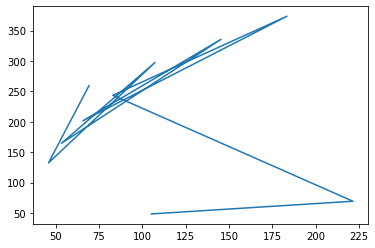

In [34]:

import numpy as np
import matplotlib.pyplot as plt

#PosVsTime = np.random.rand(2, 10)
PosVsTime = np.array([[x for x in range(1)], [x*x for x in range(1)]])
VelocityVsTime = np.empty((2, 10), float)

for i in range(1, len(PosVsTime[0])-1):
    velocity = (PosVsTime[1][i+1] - PosVsTime[1][i-1]) / (PosVsTime[0][i+1] - PosVsTime[0][i-1])
    VelocityVsTime = np.append(VelocityVsTime, [[PosVsTime[0][i]], [velocity]], axis=1)
    
print(VelocityVsTime)

AccelerationvsTime = np.empty((2, 10), float)

for j in range(1, len(VelocityVsTime[1])-1):
    acceleration = (VelocityVsTime[1][i+1] - VelocityVsTime[1][i-1]) / (VelocityVsTime[0][i+1] - VelocityVsTime[0][i-1])
    AccelerationvsTime = np.append(AccelerationvsTime, [[VelocityVsTime[0][i]], [acceleration]], axis=1)
    
#print(AccelerationvsTime)
#plt.plot(PosVsTime[0], PosVsTime[1])
plt.plot(VelocityVsTime[0], VelocityVsTime[1])
#plt.plot(AccelerationvsTime[0], AccelerationvsTime[1])
plt.show()

In [86]:
from itertools import permutations

for a,p,l,e,r,c,h,y in permutations('0123456789',8):
    if int(a+p+p+l+e)+int(p+e+a+r)==int(c+h+e+r+r+y):
        print(f'e = {e}'+',',f'y = {y}')


e = 7, y = 2
e = 5, y = 8


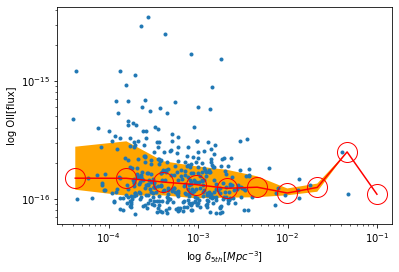

In [94]:
# https://stackoverflow.com/questions/65338042/how-to-plot-median-values-in-each-bin-and-to-show-the-25-and-75-percent-value
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

data=Table.read('sample_data.fits')
# Sample data
X=data['density']
Y=data['lineflux']
total_bins = 10
#bins = np.linspace(min(X), max(X), total_bins)
bins = np.logspace(np.log10(0.0001), np.log10(0.1), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X, bins)
running_median = [np.median(Y[idx==k]) for k in range(total_bins)]

running_prc25 = [np.percentile(Y[idx==k], 25) for k in range(total_bins)]
running_prc75 = [np.percentile(Y[idx==k], 75) for k in range(total_bins)]

fig, ax = plt.subplots()

plt.plot(X,Y,'.')
plt.plot(bins-delta/2,running_median,'-r',marker='o',fillstyle='none',markersize=20,alpha=1)

#plt.plot(bins-delta/2,running_prc25,'--r',marker=None,fillstyle='none',markersize=20,alpha=1)
#plt.plot(bins-delta/2,running_prc75,'--r',marker=None,fillstyle='none',markersize=20,alpha=1)

ax.fill_between(bins-delta/2,running_prc25,running_median, facecolor='orange')
ax.fill_between(bins-delta/2,running_prc75,running_median, facecolor='orange')

plt.xlabel('log $\delta_{5th}[Mpc^{-3}]$')
plt.ylabel('log OII[flux]')
plt.loglog()
plt.axis('tight')
plt.show()

In [3]:
# 

def intring(n, zn):
    return [n % zi for zi in zn]

#print(intring(28, [4, 15]))
for n in range(1,61):
    print(n, ' : ', intring(n, [4, 3, 5]))

1  :  [1, 1, 1]
2  :  [2, 2, 2]
3  :  [3, 0, 3]
4  :  [0, 1, 4]
5  :  [1, 2, 0]
6  :  [2, 0, 1]
7  :  [3, 1, 2]
8  :  [0, 2, 3]
9  :  [1, 0, 4]
10  :  [2, 1, 0]
11  :  [3, 2, 1]
12  :  [0, 0, 2]
13  :  [1, 1, 3]
14  :  [2, 2, 4]
15  :  [3, 0, 0]
16  :  [0, 1, 1]
17  :  [1, 2, 2]
18  :  [2, 0, 3]
19  :  [3, 1, 4]
20  :  [0, 2, 0]
21  :  [1, 0, 1]
22  :  [2, 1, 2]
23  :  [3, 2, 3]
24  :  [0, 0, 4]
25  :  [1, 1, 0]
26  :  [2, 2, 1]
27  :  [3, 0, 2]
28  :  [0, 1, 3]
29  :  [1, 2, 4]
30  :  [2, 0, 0]
31  :  [3, 1, 1]
32  :  [0, 2, 2]
33  :  [1, 0, 3]
34  :  [2, 1, 4]
35  :  [3, 2, 0]
36  :  [0, 0, 1]
37  :  [1, 1, 2]
38  :  [2, 2, 3]
39  :  [3, 0, 4]
40  :  [0, 1, 0]
41  :  [1, 2, 1]
42  :  [2, 0, 2]
43  :  [3, 1, 3]
44  :  [0, 2, 4]
45  :  [1, 0, 0]
46  :  [2, 1, 1]
47  :  [3, 2, 2]
48  :  [0, 0, 3]
49  :  [1, 1, 4]
50  :  [2, 2, 0]
51  :  [3, 0, 1]
52  :  [0, 1, 2]
53  :  [1, 2, 3]
54  :  [2, 0, 4]
55  :  [3, 1, 0]
56  :  [0, 2, 1]
57  :  [1, 0, 2]
58  :  [2, 1, 3]
59  :  [3, 2, 4]
60  : 

C:\Users\bscho\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


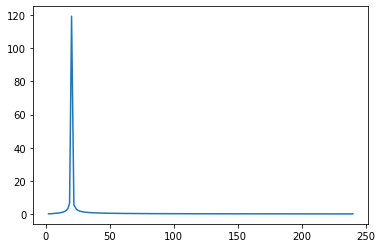

In [27]:
import numpy as np
import matplotlib.pyplot as plt

#x = np.linspace(-np.pi, np.pi, 201)
y = np.sin(np.linspace(-np.pi, np.pi, 240)*12)
fft = np.fft.rfft(y)
fft = abs(fft)
x=np.fft.rfftfreq(len(y), d=1.)
x = 1/x # to convert from freq to periods. T = 1/f
#plt.plot(y)
plt.plot(x, fft)
plt.show()

In [7]:

data = [
    [1,2,3,4,5],
    [1,2,3,4,5],
    [2,3,4,5,6],
    [5,6,8,9,10],
    [1,2,3,4,5]]

result = 0
values = []
for r in range(min(len(data),len(data[0]))-3):
    for c in range(min(len(data),len(data[0]))-3):
        prod = 1
        for i in range(4): prod *= data[r+i][c+i]
        if prod<result: continue
        result = prod
        values = [data[r+i][c+i] for i in range(4)]

print(result,values)
# 360 [2, 4, 9, 5]


360 [2, 4, 9, 5]


C:\Users\bscho\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\bscho\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\bscho\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.999965812558746
0.9999681334443182


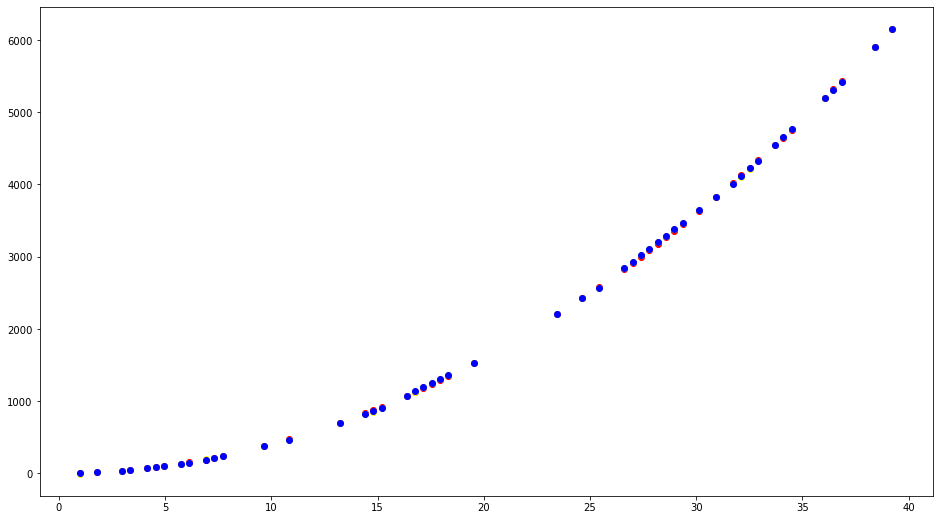

In [41]:
# https://stackoverflow.com/questions/66064867/mlp-regressor-to-predict-function-with-two-variables
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

x = np.linspace(1,40,100) 
T = np.array([1,2,3,4,5,6,7,8])
colmp = ["yellow", "blue", "green", "orange", "black", "grey", "teal", "magenta"]

def f(x,T):
    return T * x**2

def f2(x,T): # just to test for different fits
    return -T * x**2 + x

# train on three curves - note the warm start on the lst two
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1), f(x,T[1]).reshape(-1,1) , test_size = 0.5)
model = MLPRegressor(hidden_layer_sizes = 40,activation = "relu" ,random_state = 1, max_iter = 512,solver ='lbfgs', warm_start=False)
# note warm start in the next two regressions
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1), f(x,T[2]).reshape(-1,1) , test_size = 0.5)
model = MLPRegressor(hidden_layer_sizes = 40,activation = "relu" ,random_state = 1, max_iter = 512,solver ='lbfgs', warm_start=True)
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1), f(x,T[3]).reshape(-1,1) , test_size = 0.5)
model = MLPRegressor(hidden_layer_sizes = 40,activation = "relu" ,random_state = 1, max_iter = 512,solver ='lbfgs', warm_start=True)

plt.figure(figsize = (16,9))
plt.plot(X_test,y_test,"o", color = "red")

# predict on the last two T-values
model.fit(X_train, y_train)
expected_y  = y_test 
predicted_y = model.predict(X_test)
print(r2_score(expected_y, predicted_y))
plt.plot(X_test,predicted_y,"o", color = colmp[0])

model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
print(r2_score(expected_y, predicted_y))
plt.plot(X_test,predicted_y,"o", color = colmp[1])

plt.show()


In [22]:

def nr(r, p):
    return p*(6+r)*(6+r)*(5+r)-100-r*r*r+r*r

print(nr(4, 0.1644))

-0.040000000000020464


In [1]:

# make a prediction with a multinomial logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model on the whole dataset
model.fit(X, y)
# define a single row of input data
row = [1.89149379, -0.39847585, 1.63856893, 0.01647165, 1.51892395, -3.52651223, 1.80998823, 0.58810926, -0.02542177, -0.52835426]
# predict the class label
yhat = model.predict([row])
# summarize the predicted class
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


>0.0000 0.777 (0.037)
>0.0001 0.683 (0.049)
>0.0010 0.762 (0.044)
>0.0100 0.775 (0.040)
>0.1000 0.774 (0.038)
>1.0000 0.777 (0.037)


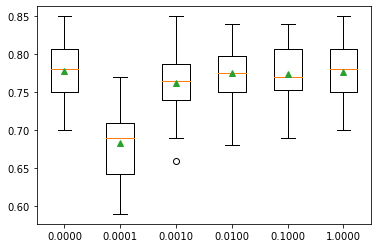

In [2]:
# https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
# tune regularization for multinomial logistic regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1, n_classes=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
		# create name for model
		key = '%.4f' % p
		# turn off penalty in some cases
		if p == 0.0:
			# no penalty in this case
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
		else:
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the scores
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize progress along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

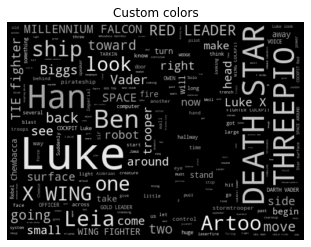

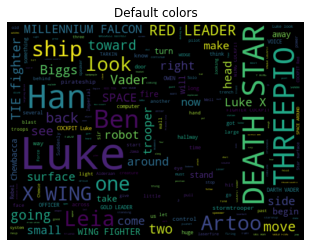

In [2]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS


def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
mask = np.array(Image.open(path.join(d, "stormtrooper_mask.png")))

# movie script of "a new hope"
# http://www.imsdb.com/scripts/Star-Wars-A-New-Hope.html
# May the lawyers deem this fair use.
text = open(path.join(d, 'a_new_hope.txt')).read()

# pre-processing the text a little bit
text = text.replace("HAN", "Han")
text = text.replace("LUKE'S", "Luke")

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)
# store default colored image
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
wc.to_file("a_new_hope.png")
plt.axis("off")
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

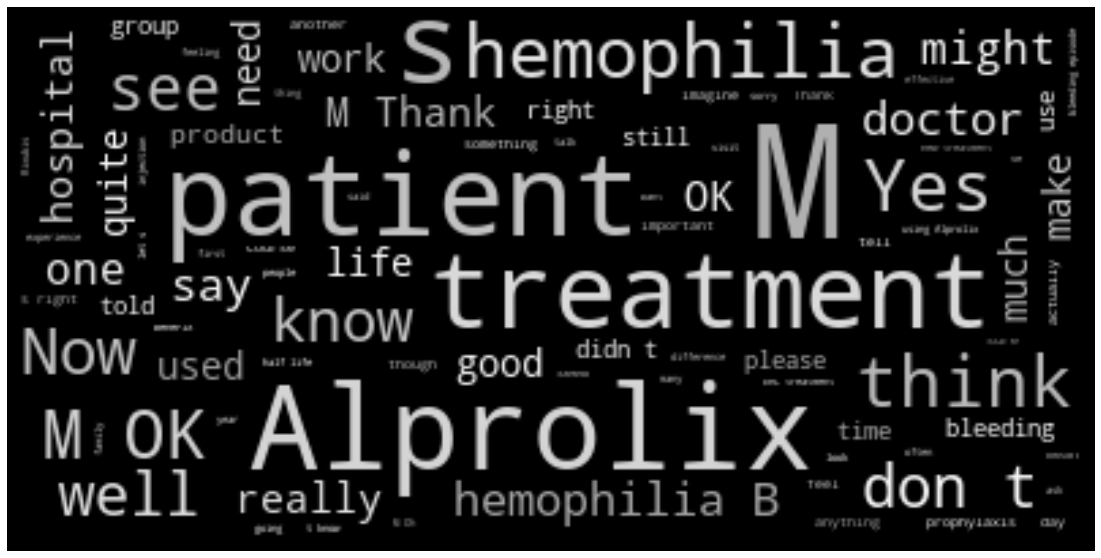

In [17]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random
from wordcloud import WordCloud, STOPWORDS

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

MY_PATH = r'C:\Users\bscho\Documents\DL\lrgtxt0'
os.chdir(MY_PATH)
    
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
#mask = np.array(Image.open(path.join(d, "stormtrooper_mask.png")))

# movie script of "a new hope"
# http://www.imsdb.com/scripts/Star-Wars-A-New-Hope.html
# May the lawyers deem this fair use.
text = open(path.join(d, 'pat doc trns V0.txt'), encoding="utf-8").read()

# pre-processing the text a little bit
#text = text.replace("HAN", "Han")
#text = text.replace("LUKE'S", "Luke")

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
#stopwords.add("int")
#stopwords.add("ext")

#wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
#               random_state=1).generate(text)
wc = WordCloud(max_words=1000, stopwords=stopwords, margin=10,
               random_state=1).generate(text)
# store default colored image
default_colors = wc.to_array()
plt.figure(figsize=(20,10))
#plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
wc.to_file("wc_out0.png")
plt.axis("off")
#plt.figure()

#plt.title("Default colors")
#plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
# lblidx3 = [('MOST', 0), ('SECOND-MOST', 1), ('THIRD-MOST', 2)]

def lblidxn(n):
    '''create a label index'''
    return [(str(idx+1)+'.-MOST', idx) if idx > 0 else ('MOST', idx) for idx in range(n)]

print(lblidxn(5))

[('MOST', 0), ('2.-MOST', 1), ('3.-MOST', 2), ('4.-MOST', 3), ('5.-MOST', 4)]


In [1]:

def un(n):
    '''units'''
    basel = [i for i in range(n)]
    res = []
    for el in basel:
        res += [i for i in basel if (i*el) % n == 1]
    res.sort()
    return res

print(un(5), un(14))
print(un(30), un(5), un(6))
print(un(21), un(3), un(7))

[1, 2, 3, 4] [1, 3, 5, 9, 11, 13]
[1, 7, 11, 13, 17, 19, 23, 29] [1, 2, 3, 4] [1, 5]
[1, 2, 4, 5, 8, 10, 11, 13, 16, 17, 19, 20] [1, 2] [1, 2, 3, 4, 5, 6]


In [10]:
import urllib.request
from collections import Counter

GRID = """
N 	D 	E
O 	K 	G
E 	L 	W
"""

def getwords(url='http://wiki.puzzlers.org/pub/wordlists/unixdict.txt'):
    "Return lowercased words of 3 to 9 characters"
    words = urllib.request.urlopen(url).read().decode().strip().lower().split()
    return (w for w in words if 2 < len(w) < 10)
 
def solve(grid, dictionary):
    gridcount = Counter(grid)
    mid = grid[4]
    return [word for word in dictionary
            if mid in word and not (Counter(word) - gridcount)]

if __name__ == '__main__':
    chars = ''.join(GRID.strip().lower().split())
    found = solve(chars, dictionary=getwords())
    print('\n'.join(found))

eke
elk
keel
keen
keg
ken
keno
knee
kneel
knew
know
knowledge
kong
leek
week
wok
woke


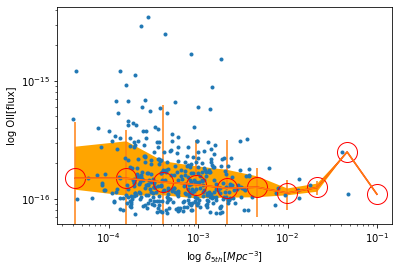

In [9]:

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

data=Table.read('sample_data.fits')
# Sample data
X=data['density']
Y=data['lineflux']
total_bins = 10
#bins = np.linspace(min(X), max(X), total_bins)
bins = np.logspace(np.log10(0.0001), np.log10(0.1), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X, bins)
running_median = [np.median(Y[idx==k]) for k in range(total_bins)]

running_prc25 = [np.percentile(Y[idx==k], 25) for k in range(total_bins)]
running_prc75 = [np.percentile(Y[idx==k], 75) for k in range(total_bins)]

'''plt.plot(X,Y,'.')
plt.plot(bins-delta/2,running_median,'-r',marker='o',fillstyle='none',markersize=20,alpha=1)

plt.plot(bins-delta/2,running_prc25,'--r',marker=None,fillstyle='none',markersize=20,alpha=1)
plt.plot(bins-delta/2,running_prc75,'--r',marker=None,fillstyle='none',markersize=20,alpha=1)'''

fig, ax = plt.subplots()

plt.plot(X,Y,'.')
plt.plot(bins-delta/2,running_median,'-r',marker='o',fillstyle='none',markersize=20,alpha=1)

running_std = [np.std(Y[idx==k]) for k in range(total_bins)]
plt.errorbar(bins-delta/2,running_median, running_std)

#plt.plot(bins-delta/2,running_prc25,'--r',marker=None,fillstyle='none',markersize=20,alpha=1)
#plt.plot(bins-delta/2,running_prc75,'--r',marker=None,fillstyle='none',markersize=20,alpha=1)

ax.fill_between(bins-delta/2,running_prc25,running_median, facecolor='orange')
ax.fill_between(bins-delta/2,running_prc75,running_median, facecolor='orange')

plt.xlabel('log $\delta_{5th}[Mpc^{-3}]$')
plt.ylabel('log OII[flux]')
plt.loglog()
plt.axis('tight')
plt.show()


In [7]:
# https://towardsdatascience.com/time-series-in-python-part-2-dealing-with-seasonal-data-397a65b74051

import statsmodels.api as sm
from statsmodels.api import OLS
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import numpy as np


plt.style.use('Solarize_Light2')

r = requests.get('https://datamarket.com/api/v1/list.json?ds=22ox')
jobj = json.loads(r.text[18:-1])
data = jobj[0]['data']
df = pd.DataFrame(data, columns=['time','data']).set_index('time')
train = df.iloc[:-24, :]
test = df.iloc[-24:, :]
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)
pred = test.copy()
df.plot(figsize=(12,3));
plt.title(jobj[0]['title'])

x, y = np.arange(len(decomposition.trend.dropna())), decomposition.trend.dropna()
x = sm.add_constant(x)
model = OLS(y, x)
res = model.fit()
print(res.summary())
fig, ax = plt.subplots(1, 2, figsize=(12,6));
ax[0].plot(decomposition.trend.dropna().values, label='trend')
ax[0].plot([res.params.x1*i + res.params.const for i in np.arange(len(decomposition.trend.dropna()))])
ax[1].plot(res.resid.values)
ax[1].plot(np.abs(res.resid.values))
ax[1].hlines(0, 0, len(res.resid), color='r')
ax[0].set_title("Trend and Regression")
ax[1].set_title("Residuals")

from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12)
model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12, damped=True)
fit = model.fit()
pred = fit.forecast(24)
fit2 = model2.fit()
pred2 = fit2.forecast(24)

sse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
sse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[60:], train.values[60:])
ax.plot(test.index, test.values, label='truth')
ax.plot(test.index, pred, linestyle='--', color='#ff7823', label="w/o damping (RMSE={:0.2f}, AIC={:0.2f})".format(sse1, fit.aic))
ax.plot(test.index, pred2, linestyle='--', color='#3c763d', label="damped (RMSE={:0.2f}, AIC={:0.2f})".format(sse2, fit2.aic))
ax.legend()
ax.set_title("Holt-Winter's Seasonal Smoothing")


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Stationary data
df['station'] = df.data - df.data.rolling(12).mean()

fig, ax = plt.subplots(3, figsize=(12,6))
x = (df.station.dropna() - df.station.dropna().shift(12)).dropna()
ax[0] = plot_acf(x, ax=ax[0], lags=25)
ax[1] = plot_pacf(x, ax=ax[1], lags=25)
ax[2].plot(x)

from statsmodels.tsa.statespace.sarimax import SARIMAX

train_st = df.ix[:-24, "station"]
test_st = df.ix[-24:, "station"]
sarima_model = SARIMAX(train_st, order=(0, 1, 2), seasonal_order=(0, 1, 2, 12), enforce_invertibility=False, enforce_stationarity=False)
sarima_fit = sarima_model.fit()

sarima_pred = sarima_fit.get_prediction("1974-01", "1975-12")
predicted_means = p.predicted_mean + df.data.iloc[-36:-1].rolling(12).mean().dropna().values
predicted_intervals = p.conf_int(alpha=0.05)
lower_bounds = predicted_intervals['lower station'] + df.data.iloc[-36:-1].rolling(12).mean().dropna().values
upper_bounds = predicted_intervals['upper station'] + df.data.iloc[-36:-1].rolling(12).mean().dropna().values

sarima_rmse = np.sqrt(np.mean(np.square(test_st.values - p.predicted_mean.values)))

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df.data.index[100:-24], df.data.values[100:-24])
ax.plot(test_st.index, test_st.values + df.data.iloc[-36:-1].rolling(12).mean().dropna().values, label='truth')
ax.plot(test_st.index, predicted_means, color='#ff7823', linestyle='--', label="prediction (RMSE={:0.2f})".format(sarima_rmse))
ax.fill_between(test_st.index, lower_bounds, upper_bounds, color='#ff7823', alpha=0.3, label="confidence interval (95%)")
ax.legend()
ax.set_title("SARIMA")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [1]:
# robot
import numpy as np

def robmvs(n):
    xy = [0, 0]
    dirs = np.array([(0,1), (1,0), (0,-1), (-1,0)])
    ndirs = [0, 1, 2, 3]
    for i in range(n):
        cdir = np.random.choice(ndirs, 1)[0]
        xy[0] += dirs[cdir][0]
        xy[1] += dirs[cdir][1]
    return xy

grid = np.zeros((9,9))
#print(robmvs(4))

for i in range(5000):
    rmv = robmvs(4)
    grid[4+rmv[0], 4+rmv[1]] += 1
#row_sums = grid.sum(axis=1)
#new_matrix = grid / row_sums[:, np.newaxis]
print(grid)

[[  0.   0.   0.   0.  15.   0.   0.   0.   0.]
 [  0.   0.   0.  78.   0.  81.   0.   0.   0.]
 [  0.   0.  93.   0. 317.   0. 135.   0.   0.]
 [  0.  80.   0. 468.   0. 488.   0.  91.   0.]
 [ 17.   0. 294.   0. 707.   0. 318.   0.  18.]
 [  0.  82.   0. 407.   0. 518.   0.  89.   0.]
 [  0.   0. 132.   0. 299.   0. 112.   0.   0.]
 [  0.   0.   0.  68.   0.  77.   0.   0.   0.]
 [  0.   0.   0.   0.  16.   0.   0.   0.   0.]]


In [1]:

def un(n):
    '''units'''
    basel = [i for i in range(n)]
    res = []
    for el in basel:
        res += [i for i in basel if (i*el) % n == 1]
    res.sort()
    return res

def unn(a,b):
    u = un(a * b)
    ua = un(a)
    ub = un(b)
    lua = len(ua)
    lub = len(ub)
    return [(ui, ua[idx % lua], ub[idx % lub]) for idx, ui in enumerate(u)]

print(unn(5,6))

print(unn(7,11))
print(unn(12,17))

[(1, 1, 1), (7, 2, 5), (11, 3, 1), (13, 4, 5), (17, 1, 1), (19, 2, 5), (23, 3, 1), (29, 4, 5)]
[(1, 1, 1), (2, 2, 2), (3, 3, 3), (4, 4, 4), (5, 5, 5), (6, 6, 6), (8, 1, 7), (9, 2, 8), (10, 3, 9), (12, 4, 10), (13, 5, 1), (15, 6, 2), (16, 1, 3), (17, 2, 4), (18, 3, 5), (19, 4, 6), (20, 5, 7), (23, 6, 8), (24, 1, 9), (25, 2, 10), (26, 3, 1), (27, 4, 2), (29, 5, 3), (30, 6, 4), (31, 1, 5), (32, 2, 6), (34, 3, 7), (36, 4, 8), (37, 5, 9), (38, 6, 10), (39, 1, 1), (40, 2, 2), (41, 3, 3), (43, 4, 4), (45, 5, 5), (46, 6, 6), (47, 1, 7), (48, 2, 8), (50, 3, 9), (51, 4, 10), (52, 5, 1), (53, 6, 2), (54, 1, 3), (57, 2, 4), (58, 3, 5), (59, 4, 6), (60, 5, 7), (61, 6, 8), (62, 1, 9), (64, 2, 10), (65, 3, 1), (67, 4, 2), (68, 5, 3), (69, 6, 4), (71, 1, 5), (72, 2, 6), (73, 3, 7), (74, 4, 8), (75, 5, 9), (76, 6, 10)]
[(1, 1, 1), (5, 5, 2), (7, 7, 3), (11, 11, 4), (13, 1, 5), (19, 5, 6), (23, 7, 7), (25, 11, 8), (29, 1, 9), (31, 5, 10), (35, 7, 11), (37, 11, 12), (41, 1, 13), (43, 5, 14), (47, 7, 15),

In [1]:
# Eulers Phi
import math

def primes_sieve(limit):
    limitn = limit+1
    not_prime = set()
    primes = []
    for i in range(2, limitn):
        if i in not_prime:
            continue
        for f in range(i*2, limitn, i):
            not_prime.add(f)
        primes.append(i)
    return primes

def phi(n):
    return len([i for i in range(1,n) if math.gcd(n,i) == 1])

print(phi(6), phi(12))

print(primes_sieve(30))

for p in primes_sieve(200):
    for n in range(1,p-1):
        if phi(n) == p:
            print(p)

2 4
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]


In [1]:
import numpy as np
from numpy.linalg import inv

a = np.array([[1., 2.], [3., 4.]])
ainv = inv(a)
print(ainv)

[[-2.   1. ]
 [ 1.5 -0.5]]


In [11]:
import datetime

x = datetime.datetime.now()
print(x)
print(x.strftime("%y-%m-%d %H:00:00"))

2021-03-07 11:29:25.448860
21-03-07 11:00:00


In [1]:
edges = [(2, 4), (3, 4), (6, 8), (6, 9), (7, 10), (11, 13)]
# want [(2, 4), (6, 10), (11, 13)]
# [(2, 4), (6, 9), (7, 10), (11, 13)]

edglst = []
for cedg in edges:
    newitm = [edg for edg in edges if edg[0]==cedg[0] or edg[1]==cedg[1]]
    if not newitm in edglst:
        edglst.append(newitm)

intervals = [[-5,-3],[-4,-1],[1,3],[4,8],[5,10],[10,12], [15,20]]

from functools import reduce
disjoints = [*reduce(lambda a,b: a+[b] if not a or b[0]>a[-1][1] else a[:-1]+[[a[-1][0],b[1]]],intervals,[])]

print(disjoints) # [[-5, -1], [1, 3], [4, 12], [15, 20]]

[[-5, -1], [1, 3], [4, 12], [15, 20]]


In [13]:
with open("DPMMMM.DAT", "rb") as f:
    byte = f.read(1)
    while byte != b"":
        # Do stuff with byte.
        bytes = f.read(400)
        print(bytes)
        break



b'\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa3\xf1ZKg\xb5\xd8L"\r\rM\xba\xf6?N}\xc7\x06N\xe7\xe3\xc4G48\xb0R\xb2\xafUK\xb3q\xe7L\x18\xd9\x18M\xb5\x85:N\xb0\xee\tNB\x9a\xc0G\xaa\xcc\xb1T\xeb\xcdOK\x15x\xebL7Y\x18M\xec\xd2<N\x9c\xd1\x05N*\xcb\xbbG\x16b\xaeT\x7fbCK"\xd1\xe3L\x98\x84\x10M>c(N\xab\x99\xf8M\x16k\xaeG\xda\xdd\xbdT\x8b-ZK\x11\x86\xf1L6\xe7\x12M\xc5q9N\xe7\x13\x0cN\xcf\xbd\xc6G`\xa2\xbcT\x9fgOK\x0b]\xe5L?\x14\nM\xed\xef1N\x0f\xbc\x02N\xb2I\xbcGm\x84\xbcT\xf6\x9a>K\x82|\xd8L\xa6\x14\x05M1\xa5(N\xc5\x07\xf3M\xd3u\xb1G\x0c\x00\xadT\xddeQK@5\xe9L\xd6\xe6\x0eM\x06\x04;N\xc3T\x05N\x85\xf4\xbfG\xa6)\xafT\x85\xb8QKw\x7f\xebL\x1c

In [2]:
import math

def factrs(n):
    '''factor n'''
    return [f for f in range(1,n+1) if n % f == 0]

print(factrs(2021))

[1, 43, 47, 2021]


In [7]:
def totf(g,sg):
    return (44-sg)/(6+g)

print([(g,sg,totf(g,sg)) for g in range(1,8) for sg in [1,3,5,6,7]])

[(1, 1, 6.142857142857143), (1, 3, 5.857142857142857), (1, 5, 5.571428571428571), (1, 6, 5.428571428571429), (1, 7, 5.285714285714286), (2, 1, 5.375), (2, 3, 5.125), (2, 5, 4.875), (2, 6, 4.75), (2, 7, 4.625), (3, 1, 4.777777777777778), (3, 3, 4.555555555555555), (3, 5, 4.333333333333333), (3, 6, 4.222222222222222), (3, 7, 4.111111111111111), (4, 1, 4.3), (4, 3, 4.1), (4, 5, 3.9), (4, 6, 3.8), (4, 7, 3.7), (5, 1, 3.909090909090909), (5, 3, 3.727272727272727), (5, 5, 3.5454545454545454), (5, 6, 3.4545454545454546), (5, 7, 3.3636363636363638), (6, 1, 3.5833333333333335), (6, 3, 3.4166666666666665), (6, 5, 3.25), (6, 6, 3.1666666666666665), (6, 7, 3.0833333333333335), (7, 1, 3.3076923076923075), (7, 3, 3.1538461538461537), (7, 5, 3.0), (7, 6, 2.923076923076923), (7, 7, 2.8461538461538463)]


In [1]:
import numpy as np

a = np.array([[2, 0]])
print(a * a.T)
print(a.dot(a.T))

a = np.array([[1, 1, 1]])
print(a * a.T)
print(a.dot(a.T))

print(np.array([[-1, 2, 0]]) - a * a.T / a.dot(a.T) * np.array([[-1, 2, 0]]))

[[4 0]
 [0 0]]
[[4]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[3]]
[[-0.66666667  1.33333333  0.        ]
 [-0.66666667  1.33333333  0.        ]
 [-0.66666667  1.33333333  0.        ]]


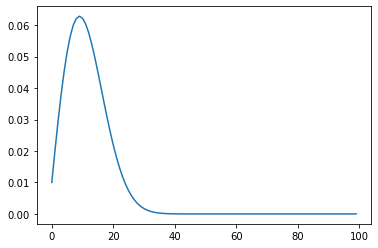

In [1]:
import matplotlib.pyplot as plt

def piep():
    res = []
    pie = 1.
    for p in range(1,101):
        res.append(pie * p / 100)
        pie -= pie * p / 100
    return res

#print(piep())

plt.plot(piep())
plt.show()

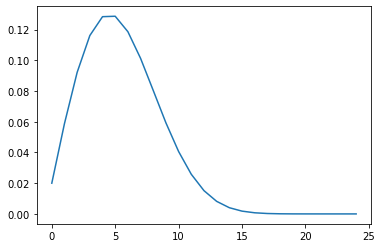

In [1]:
import matplotlib.pyplot as plt

def piep(p0): # successive pieces of pie as % of previous rest of pie
    res = []
    pie = 1.
    for p in range(1,p0+1,int(100/p0)):
        res.append(pie * p / p0)
        pie -= pie * p / p0
    return res

#print(piep())

plt.plot(piep(50))
plt.show()

In [2]:
import numpy as np

# payoffs (R,C)-players
pyffs = np.array([[(5,5), (-5,10)],
                 [(10,-5), (-2,-2)]])

tittat = np.array([0, 1]) # 0=Coop, 1=Defect, (player action, player reaction) by index

def payoff(spr, spc, pyffm):
    return pyffm[spr, spc]

def nxtmv(pa, strat): # p action -> p reaction
    return strat[pa]

print(payoff(0, 0, pyffs))
print(nxtmv(0, tittat))

p0 = 0
p1 = nxtmv(p0, tittat)
p0c, p1c = payoff(p0, p1, pyffs)
p0 = nxtmv(p1, tittat)
p1 = nxtmv(p0, tittat)
dp0, dp1 = payoff(p0, p1, pyffs)
p0c += dp0
p1c += dp1

print(p0c, p1c)

[5 5]
0
10 10


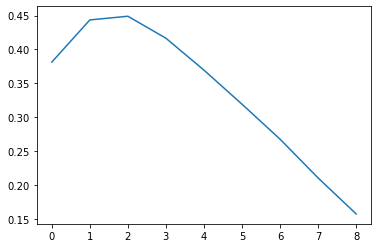

In [67]:
# simulate best candidate choice
import numpy as np
import matplotlib.pyplot as plt

def cdchc(t, clst):
    best_std = np.max(clst[:int(1/t)])
    #print(best_std)
    cctr = 0
    cc = 0
    for cc in clst[int(1/t):]:
        if cc > best_std:
            break
        cctr += 1
    if cctr == len(clst):
        cc = best_std
    #print('best: ', np.max(clst), ' best found: ', cc)
    if np.max(clst) == cc:
        return (True, cctr)
    return (False, cctr)

ntrls = 20000
x = range(1,10)
y = []
for ti in x:
    t = 1/ti
    succ = 0

    for k in range(ntrls):
        clst = np.random.randint(10, size=10)
        res = cdchc(t, clst)
        if res[0]:
            succ += 1
    #print('success rate', succ)
    y.append(succ/ntrls)
    
plt.plot(y)
plt.show()

In [3]:
import math 
import random

def H(sentence): 
    """
    Equation 3.49 (Shannon's Entropy) is implemented.
    """
    entropy = 0 
    # There are 256 possible ASCII characters
    for character_i in range(256): 
        Px = sentence.count(chr(character_i))/len(sentence) 
        if Px > 0: 
            entropy += - Px * math.log(Px, 2) 
    return entropy

# The telegrapher creates the "encoded message" with length 10000.
# When he uses only 32 chars 
simple_message ="".join([chr(random.randint(0,32)) for i in range(10000)])
# When he uses all 255 chars
complex_message ="".join([chr(random.randint(0,255)) for i in range(10000)])
# Seeing is believing.
print(H(simple_message))
print(H(complex_message))
# The entropy increases as the uncertainty of which character will be sent increases.

5.042342212829554
7.97938062343576


In [6]:
# breadth-first
from collections import deque

def bfrst(name):
    srch_q = deque() # creates a new queue
    srch_q += graph[name] # adds all neighbors to search queue
    srchd = [] # already searched
    while srch_q:
        prsn = srch_q.popleft()
        if not prsn in srchd: # not already searched this node
            if prsn_tgt(prsn):
                print('found: ', prsn)
                return True
            else:
                srch_q += graph[prsn]
                srchd.append(prsn)
    return False

def prsn_tgt(prsn):
    return prsn == 'johnny'

graph = {}
graph['you'] = ['alice', 'bob', 'claire']
graph['alice'] = ['peggy']
graph['bob'] = ['tom', 'johnny']
graph['claire'] = []
graph['peggy'] = []
graph['tom'] = []
graph['johnny'] = []

bfrst('you')

found:  johnny


True

In [4]:

def un(n):
    '''units'''
    basel = [i for i in range(n)]
    res = []
    for el in basel:
        res += [i for i in basel if (i*el) % n == 1]
    res.sort()
    return res

print(un(12))
print(un(20))
print(un(16))
print(un(45))

print(15*15/45)

[1, 5, 7, 11]
[1, 3, 7, 9, 11, 13, 17, 19]
[1, 3, 5, 7, 9, 11, 13, 15]
[1, 2, 4, 7, 8, 11, 13, 14, 16, 17, 19, 22, 23, 26, 28, 29, 31, 32, 34, 37, 38, 41, 43, 44]
5.0


In [11]:
# Dijkstra's algo
from collections import deque

def find_lwst_cst(costs, procssd):
    lwst_cst = float('inf')
    lwst_cst_nd = None
    for node in costs: # process nodes
        cost = costs[node]
        if cost < lwst_cst and node not in procssd:
            lwst_cst = cost
            lwst_cst_nd = node
    return lwst_cst_nd

graph = {}
graph['start'] = {}
graph['start']['a'] = 6
graph['start']['b'] = 2
graph['a'] = {}
graph['a']['fin'] = 1

graph['b'] = {}
graph['b']['a'] = 3
graph['b']['fin'] = 5

graph['fin'] = {}

infinity = float('inf')
costs = {}
costs['a'] = 6
costs['b'] = 2
costs['fin'] = infinity

parents = {}
parents['a'] = 'start'
parents['b'] = 'start'
parents['fin'] = None

procssd = []

node = find_lwst_cst(costs, procssd) # find lowest cost node not yet processed
while node is not None:
    cost = costs[node]
    nghbrs = graph[node]
    for n in nghbrs.keys():
        new_cst = cost + nghbrs[n]
        if costs[n] > new_cst:
            costs[n] = new_cst
            parents[n] = node
    procssd.append(node)
    node = find_lwst_cst(costs, procssd)
    
print(costs)

{'a': 5, 'b': 2, 'fin': 6}


In [18]:
# greedy algorithm

classes = {'hist': (9,11), 'bio': (10,12), 'eng': (11,13), 'it': (12,14), 'math': (8,10)}

def grdscd(tims):
    res = []
    ctm = min([st[0] for st in tims.values()])
    while True:
        ccl = [c for c in tims.items() if c[1][0] == ctm]
        if ccl == []:
            return res
        res.append(ccl[0])
        ctm = ccl[0][1][1]
    return res

print(grdscd(classes))

[('math', (8, 10)), ('bio', (10, 12)), ('it', (12, 14))]
